In [28]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
import statsmodels.api as sm
import itertools
from sklearn import dummy, metrics
from sklearn import model_selection as ms

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

rand_st=4

In [2]:
elos=pd.read_csv(r'C:\Users\Asus\PredictingRatings\data\clean_elos.csv')
elos.head()

,WhiteElo,BlackElo,MeanElos,DiffElos,SumElos
0,2354,2411,2382,-57,4765
1,1915,1999,1957,-84,3914
2,2446,2191,2318,255,4637
3,2168,2075,2121,93,4243
4,2437,2254,2345,183,4691


In [3]:
features=pd.read_csv(r'C:\Users\Asus\PredictingRatings\data\features.csv')

print(features.info())
print(features.shape)
features.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24255 entries, 0 to 24254
Columns: 233 entries, Result to InsufficientMaterial
dtypes: float64(111), int64(122)
memory usage: 43.1 MB
None
(24255, 233)


,Result,NumMoves,MeanScore,ModeScore,FinalScore,FullMoves,MinScore,MaxScore,MedianScore,StdScore,...,EndB,EndR,EndK,WhiteСhecks,WhiteQueenCastle,BlackQueenCastle,Promotion,EnPassant,CanClaimDraw,InsufficientMaterial
count,24255.000000,24255.000000,24255.000000,24255.000000,24255.000000,24255.000000,24255.000000,24255.000000,24255.000000,24255.000000,...,24255.000000,24255.00000,24255.0,24255.000000,24255.000000,24255.000000,24255.000000,24255.000000,24255.000000,24255.000000
mean,0.544877,42.252690,30.881103,11.907442,111.901711,83.967223,-794.591878,988.643950,68.913894,314.678490,...,0.631293,1.03892,1.0,2.015584,1.457308,0.910740,0.064069,0.061637,0.035415,0.000783
std,0.417736,16.235593,233.709202,445.214702,2310.851869,32.489872,2126.099646,2275.840558,64.170646,475.478471,...,0.676858,0.74847,0.0,2.874868,4.179615,3.663225,0.291749,0.245589,0.184831,0.027978
min,0.000000,10.000000,-2162.262500,-11447.000000,-12261.000000,19.000000,-12348.000000,-51.000000,0.000000,7.795716,...,0.000000,0.00000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,31.000000,-60.758665,0.000000,-362.000000,61.000000,-482.000000,67.000000,30.000000,61.336328,...,0.000000,0.00000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,40.000000,24.563636,0.000000,0.000000,79.000000,-75.000000,156.000000,49.000000,145.621548,...,1.000000,1.00000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,51.000000,123.987715,26.000000,546.500000,102.000000,-18.000000,700.000000,84.000000,291.317992,...,1.000000,2.00000,1.0,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,165.000000,2073.289256,11259.000000,12337.000000,329.000000,26.000000,12352.000000,784.000000,3962.575036,...,2.000000,2.00000,1.0,71.000000,35.000000,36.000000,4.000000,2.000000,1.000000,1.000000


In [4]:
selector = VarianceThreshold(threshold=(.8 * (1 - .8)))
transform = selector.fit_transform(features)
features_new=pd.DataFrame(transform)
print(features_new.shape)
features_new.head()

(24255, 224)


,0,1,2,3,4,5,6,7,8,9,...,214,215,216,217,218,219,220,221,222,223
0,0.5,19.0,23.947368,3.0,54.0,38.0,-26.0,73.0,20.5,26.431587,...,1.0,1.0,1.0,6.0,1.0,1.0,2.0,0.0,0.0,0.0
1,0.0,53.0,-692.198113,18.0,-11544.0,106.0,-11544.0,93.0,63.0,2286.131735,...,0.0,0.0,0.0,2.0,0.0,0.0,1.0,4.0,0.0,0.0
2,1.0,39.0,49.246753,31.0,196.0,77.0,-30.0,198.0,37.0,51.525093,...,0.0,0.0,1.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,25.0,306.040816,18.0,875.0,49.0,10.0,917.0,142.0,313.263595,...,1.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,0.0,0.0
4,0.5,29.0,30.827586,18.0,-11.0,58.0,-15.0,94.0,29.0,24.845827,...,0.0,1.0,0.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0


In [5]:
features_new.to_csv(r'C:\Users\Asus\PredictingRatings\data\features_new.csv', sep=',',index=False)

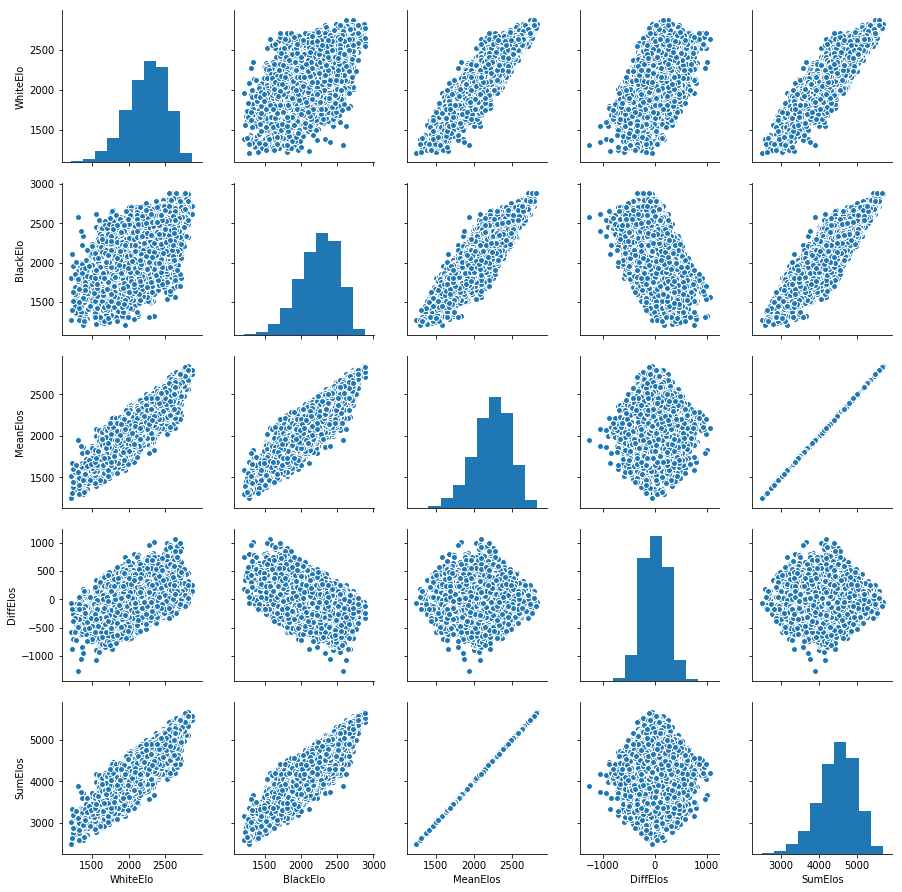

In [6]:
sns.pairplot(elos)
plt.show()

### Если сумма рейтингов и средний рейтинг настолько коррелируют, то возможно проще все же обучать на среднем рейтинге, так как итоговое предсказание меньше -> меньше разброс должен быть!!!!!!!!!!!!!!!!!!!

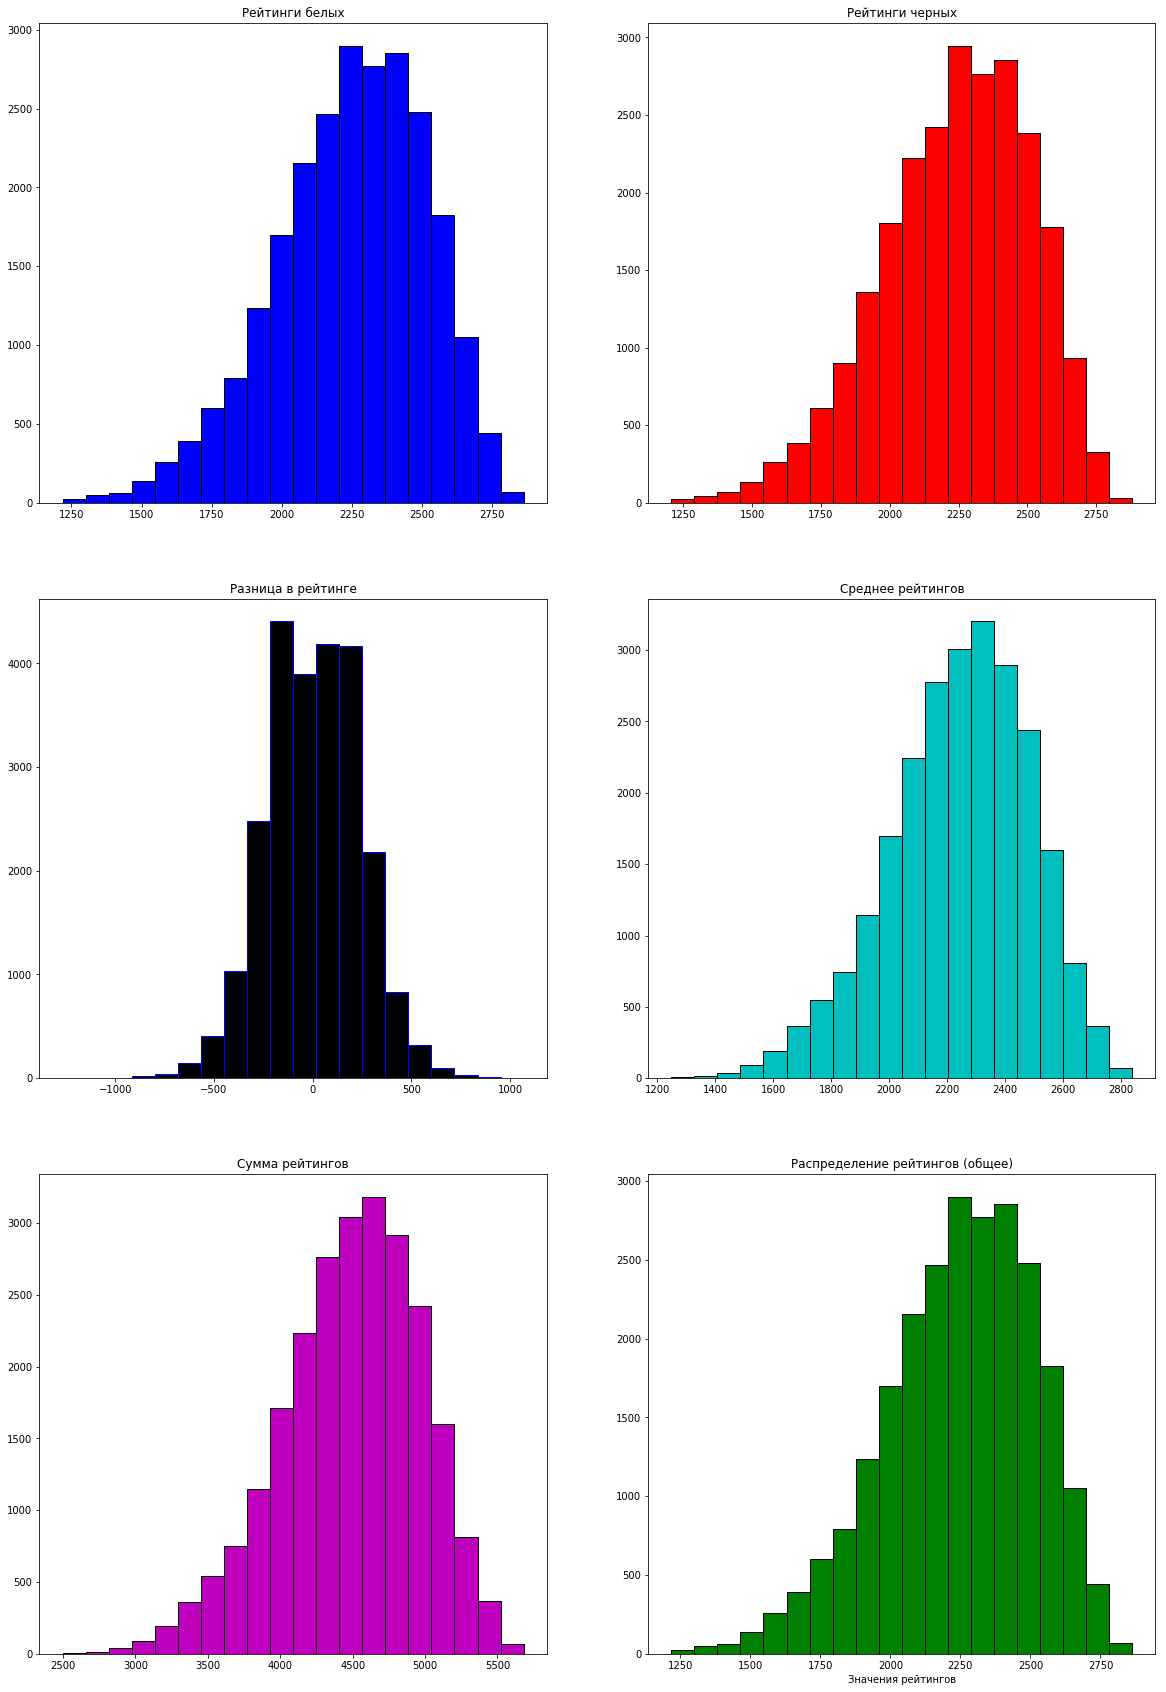

In [7]:
fig=plt.figure(figsize=(20,30))

ax1=plt.subplot(3,2,1)
plt.hist(elos.WhiteElo,color='b',edgecolor = 'black', bins = 20)
ax1.set_title('Рейтинги белых')

ax2=plt.subplot(3,2,2)
plt.hist(elos.BlackElo,color='r',edgecolor = 'black',bins = 20)
ax2.set_title('Рейтинги черных')

ax3=plt.subplot(3,2,3)
plt.hist(elos.DiffElos,color='k',edgecolor = 'blue',bins = 20)
ax3.set_title('Разница в рейтинге')

ax4=plt.subplot(3,2,4)
plt.hist(elos.MeanElos,color='c',edgecolor = 'black',bins = 20)
ax4.set_title('Среднее рейтингов')

ax5=plt.subplot(3,2,5)
plt.hist(elos.SumElos,color='m',edgecolor = 'black',bins = 20)
ax5.set_title('Сумма рейтингов')

allElos=elos.WhiteElo
allElos.append(elos.BlackElo)
ax6=plt.subplot(3,2,6)
plt.hist(allElos,color='g',edgecolor = 'black',bins = 20)
ax6.set_title('Распределение рейтингов (общее)')
ax6.set_xlabel("Значения рейтингов")
plt.show()

### Попытка разделить на классы
(по среднему рейтингу)

In [8]:
elos_2000=elos[elos["MeanElos"]<=2000]
print(elos_2000.shape)
elos_2000.head()

(3855, 5)


,WhiteElo,BlackElo,MeanElos,DiffElos,SumElos
1,1915,1999,1957,-84,3914
6,1813,1643,1728,170,3456
13,1877,1851,1864,26,3728
18,1942,1663,1802,279,3605
39,1870,2086,1978,-216,3956


In [9]:
elos_2300=elos[(elos["MeanElos"]<=2150)&(elos["MeanElos"]>2000)]
print(elos_2300.shape)
elos_2300.head()

(4112, 5)


,WhiteElo,BlackElo,MeanElos,DiffElos,SumElos
3,2168,2075,2121,93,4243
11,2047,2186,2116,-139,4233
15,2054,2099,2076,-45,4153
21,1979,2263,2121,-284,4242
26,2119,2136,2127,-17,4255


#### Очень много партий в промежутке 2000 -  2200

Всего партий:

In [10]:
elos.shape[0]

24255

In [11]:
elos_2100=elos[elos["MeanElos"]<=2100]
print(elos_2100.shape)
elos_2100.head()

(6414, 5)


,WhiteElo,BlackElo,MeanElos,DiffElos,SumElos
1,1915,1999,1957,-84,3914
6,1813,1643,1728,170,3456
13,1877,1851,1864,26,3728
15,2054,2099,2076,-45,4153
18,1942,1663,1802,279,3605


In [12]:
elos_2300=elos[(elos["MeanElos"]<=2300)&(elos["MeanElos"]>2100)]
print(elos_2300.shape)
elos_2300.head()

(7171, 5)


,WhiteElo,BlackElo,MeanElos,DiffElos,SumElos
3,2168,2075,2121,93,4243
9,2306,2093,2199,213,4399
10,2108,2273,2190,-165,4381
11,2047,2186,2116,-139,4233
12,2357,2110,2233,247,4467


In [13]:
elos_2400=elos[(elos["MeanElos"]<=2500)&(elos["MeanElos"]>2300)]
print(elos_2400.shape)
elos_2400.head()

(7252, 5)


,WhiteElo,BlackElo,MeanElos,DiffElos,SumElos
0,2354,2411,2382,-57,4765
2,2446,2191,2318,255,4637
4,2437,2254,2345,183,4691
5,2449,2201,2325,248,4650
7,2553,2052,2302,501,4605


In [14]:
elos_2500=elos[(elos["MeanElos"]>2500)]
print(elos_2500.shape)
elos_2500.head()

(3418, 5)


,WhiteElo,BlackElo,MeanElos,DiffElos,SumElos
8,2611,2520,2565,91,5131
22,2550,2502,2526,48,5052
49,2613,2742,2677,-129,5355
54,2700,2753,2726,-53,5453
71,2516,2706,2611,-190,5222


In [15]:
elos_2100.shape[0]+elos_2300.shape[0]+elos_2400.shape[0]+elos_2500.shape[0]

24255

In [16]:
elos_2100.to_csv(r'C:\Users\Asus\PredictingRatings\data\elos_2100.csv', sep=',',index=False)
elos_2300.to_csv(r'C:\Users\Asus\PredictingRatings\data\elos_2300.csv', sep=',',index=False)
elos_2400.to_csv(r'C:\Users\Asus\PredictingRatings\data\elos_2400.csv', sep=',',index=False)
elos_2500.to_csv(r'C:\Users\Asus\PredictingRatings\data\elos_2500.csv', sep=',',index=False)

Классы получились неравномерные (последний класс небольшой), но они распределены по шахматным званиям (от 2300 - мастера, от 2500 - гроссмейстеры). Неравномерность классов объясняется данной выборкой. Если будет плохой результат, можно самостоятельно добавить партии в последний класс.

In [18]:
def conditions(elo):
    if elo <= 2100:
        return 'novice'
    elif elo > 2100 and elo <= 2300:
        return 'average'
    elif elo >2300 and elo <=2500:
        return 'master'
    elif elo > 2500:
        return 'grandmaster'

elos['Class'] = elos.MeanElos.apply(conditions)

elos.head()

,WhiteElo,BlackElo,MeanElos,DiffElos,SumElos,Class
0,2354,2411,2382,-57,4765,master
1,1915,1999,1957,-84,3914,novice
2,2446,2191,2318,255,4637,master
3,2168,2075,2121,93,4243,average
4,2437,2254,2345,183,4691,master


In [19]:
elos.to_csv(r'C:\Users\Asus\PredictingRatings\data\class_elos.csv', sep=',',index=False)

#### Распределения в классах

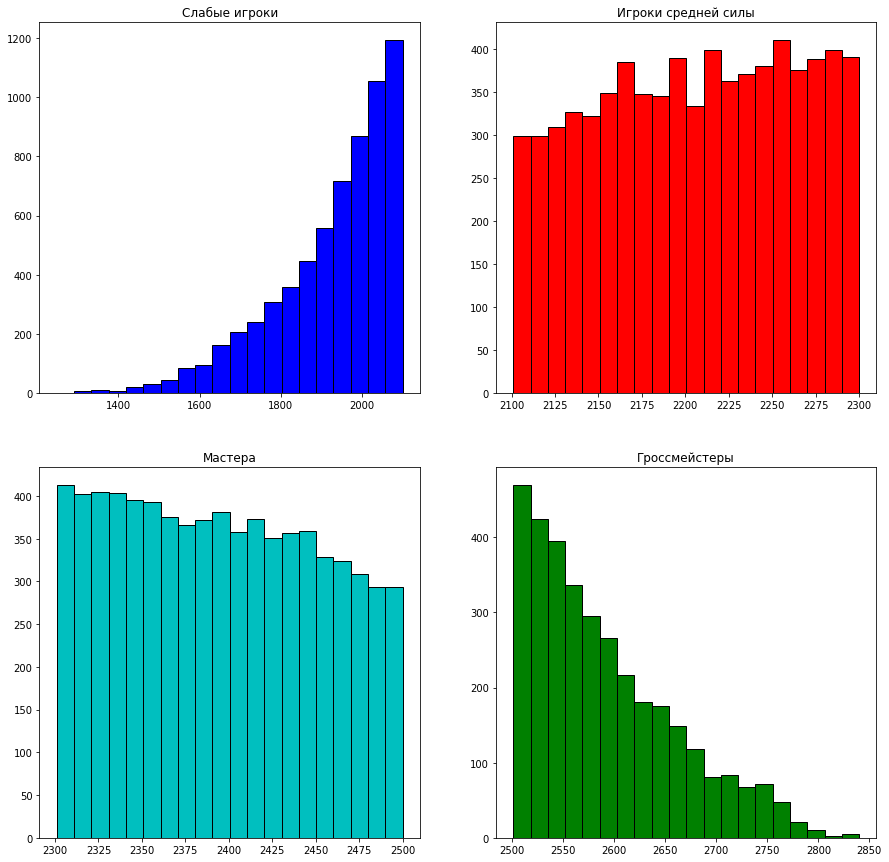

In [24]:
fig=plt.figure(figsize=(15,15))

novice=elos[elos['Class']=='novice']
ax1=plt.subplot(2,2,1)
plt.hist(novice.MeanElos,color='b',edgecolor = 'black', bins = 20)
ax1.set_title('Слабые игроки')

average=elos[elos['Class']=='average']
ax2=plt.subplot(2,2,2)
plt.hist(average.MeanElos,color='r',edgecolor = 'black', bins = 20)
ax2.set_title('Игроки средней силы')

master=elos[elos['Class']=='master']
ax3=plt.subplot(2,2,3)
plt.hist(master.MeanElos,color='c',edgecolor = 'black', bins = 20)
ax3.set_title('Мастера')

grandmaster=elos[elos['Class']=='grandmaster']
ax4=plt.subplot(2,2,4)
plt.hist(grandmaster.MeanElos,color='g',edgecolor = 'black', bins = 20)
ax4.set_title('Гроссмейстеры')

plt.show()

##### Выделение целевой переменной

In [25]:
target = elos['Class'].astype('str')
print(target.shape)
target.value_counts()

(24255,)


master         7252
average        7171
novice         6414
grandmaster    3418
Name: Class, dtype: int64

#### Построение матрицы ошибок

In [26]:
def plot_confusion_matrix(matrix, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### Разделение данных

In [32]:
#Словарь для лучших моделей (ключ - алгоритм, значение - F-мера)
dict_model={}

data= features_new.copy()
X_train, X_test, Y_train, Y_test =ms.train_test_split(features_new, target, test_size = 0.3,random_state=rand_st)
print ('Train data size: {} instances \nTest data size: {} instances'.format(len(X_train), len(Y_train)))
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

Train data size: 16978 instances 
Test data size: 16978 instances
(16978, 224)
(16978,)
(7277, 224)
(7277,)


### Выбор классификатора

#### Функция для отчетности

In [30]:
def predictions_report(pred_target,predictions,title_conf_matrix):
    accuracy = metrics.accuracy_score(pred_target, predictions)
    print ("Accuracy = {:.3f}".format(accuracy))

    # weighted - средневзвешенная оценка F-меры
    fscore= metrics.f1_score(pred_target, predictions,average='weighted')
    print("F-мера = {:.3f}".format(fscore))

    print(metrics.classification_report(pred_target, predictions))

    plot_confusion_matrix(metrics.confusion_matrix(pred_target, predictions), 
                      classes = pred_target.unique(), 
                      title=title_conf_matrix)
    return fscore

#### Baseline

Accuracy = 0.265
F-мера = 0.266
              precision    recall  f1-score   support

     average       0.29      0.29      0.29      7171
 grandmaster       0.14      0.14      0.14      3418
      master       0.30      0.30      0.30      7252
      novice       0.26      0.26      0.26      6414

    accuracy                           0.27     24255
   macro avg       0.25      0.25      0.25     24255
weighted avg       0.27      0.27      0.27     24255

Confusion matrix, without normalization


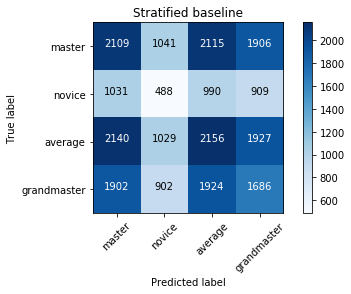

In [37]:
baseline = dummy.DummyClassifier(strategy='stratified',random_state=rand_st)
baseline.fit(data, target)
base_predictions = baseline.predict(data)
dict_model['Dummy']=predictions_report(target,base_predictions,'Stratified baseline')   

In [38]:
def GridTune(params,classifiers,folds):
    fscore = metrics.make_scorer(metrics.f1_score, average='weighted',greater_is_better=True)
    
    grid = ms.GridSearchCV(classifiers,
                           params,  # настройка параметров через кросс-валидацию
                           refit=True,    # переобучение по лучшим найденным параметрам   
                           scoring=fscore,
                           n_jobs=-1,
                           cv=ms.StratifiedKFold(n_splits=folds))
    
    grid_best_model = grid.fit(X_train,Y_train)

    print("Лучшие параметры для F-меры:")
    print(grid_best_model.best_params_)
    print('\nЛучший алгоритм:')
    print(grid_best_model.best_estimator_)
    return grid_best_model

In [ ]:
lr_params =[
        {'penalty':['l1'],'solver':['saga', 'liblinear'],'C':[0.001,0.01,0.1,1,10,100,1000,2000,5000]},
        {'penalty':['l2'],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'C':[0.001,0.01,0.1,1,10,100,100,2000,5000]}]

lr=LogisticRegression(random_state=rand_st,n_jobs=-1)
lr_model=GridTune(lr_params,lr,10)
lr_predictions=lr_model.predict(X_test)
dict_model['LogisticRegression']=predictions_report(Y_test,lr_predictions,'Logistic regression predictions')   

In [ ]:
svm_params =[{'kernel':['poly'],'degree':[2,3,4,5],'gamma':[0,1e-2, 1e-4,1e-6],'C':[0.001,0.01,0.1,1,10,100]},
            {'kernel':['rbf','sigmoid'],'gamma':[0,1e-2, 1e-4,1e-6],'C':[0.001,0.01,0.1,1,10,100]},
            {'kernel':['linear'],'C':[0.001,0.01,0.1,1,10,100]}]

svm=SVC(random_state=rand_st)
svm_model=GridTune(svm_params,svm,10)
svm_predictions=svm_model.predict(X_test)
dict_model['SVM']=predictions_report(Y_test,svm_predictions,'Support vector machine predictions')   

In [ ]:
nb_params =[{'var_smoothing':[1e-9, 1e-11, 1e-13,1e-15,1e-17,1e-7, 1e-5, 1e-3,0]}] # параметр, регулирующий дисперсии

nb=GaussianNB()
nb_model=GridTune(nb_params,nb,10)
nb_predictions=nb_model.predict(X_test)
dict_model['NaiveBayes']=predictions_report(Y_test,nb_predictions,'Naive Bayes predictions')   

In [ ]:
rf_params =[{'n_estimators':[10,50, 100, 200],'criterion':['entropy', 'gini'],'max_depth':[None, 5, 10,15],
             'min_samples_leaf':[1,2, 3, 4],'max_features':[1, 2, 3,4],'bootstrap':[True],'oob_score':[True,False]},
           {'n_estimators':[10,50, 100, 200],'criterion':['entropy', 'gini'],'max_depth':[None, 5, 10,15],
             'min_samples_leaf':[1,2, 3, 4],'max_features':[1, 2, 3,4],'bootstrap':[False]}]

rf=RandomForestClassifier(random_state=rand_st)
rf_model=GridTune(rf_params,rf,10)
rf_predictions=rf_model.predict(X_test)
dict_model['RandomForest']=predictions_report(Y_test,rf_predictions,'Random forest predictions')   

In [ ]:
ada_params =[{'n_estimators': [20,50, 100,200],'learning_rate':[0.5,1,1.5,2],'algorithm':['SAMME','SAMME.R']}]

ada=AdaBoostClassifier(random_state=rand_st)
ada_model=GridTune(ada_params,ada,10)
ada_predictions=ada_model.predict(X_test)
dict_model['AdaBoost']=predictions_report(Y_test,ada_predictions,'AdaBoost predictions')   

In [ ]:
kn_params =[{'n_neighbors':[3,5,9,11,15],
            'weights':['uniform','distance'],
            'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
            'metric':['euclidean','manhattan']}]

kn=KNeighborsClassifier(n_jobs=-1)
kn_model=GridTune(kn_params,kn,10)
kn_predictions=kn_model.predict(X_test)
dict_model['KNeighbors']=predictions_report(Y_test,kn_predictions,'K-nearest neighbors predictions')  

In [ ]:
xgb_params=[{'max_depth':[3, 5, 10,15],
             'gamma': [0,0.5,1],
             'subsample':[0.2,0.5,0.9],
              'n_estimators': [10,50, 100, 200],
              'learning_rate': [0,0.25,0.5]}]

xgb = XGBClassifier(seed=rand_st,nthread=4)
xgb_model=GridTune(xgb_params,xgb,10)
xgb.fit(X_train, Y_train)
xgb_predictions= xgb.predict(X_test)
dict_model['XGBoost']=predictions_report(Y_test,xgb_predictions,'XGBoost predictions')   

#### Отбираем 3 лучших алгоритма для Voting Classifier

In [ ]:
dict_model

In [ ]:
sorted_dict = sorted(dict_model.items(), key=lambda kv: kv[1],reverse=True)
sorted_dict[:3]

In [ ]:
vc_params =[{'voting': ['hard', 'soft'],}]
estimators=[('xgb_vt',XGBClassifier(booster='gbtree',
                                    learning_rate=0.5,
                                    max_depth=15,n_estimators=100,
                                    n_jobs=1, nthread=4,
                                    random_state=rand_st,
                                    seed=rand_st)),
             ('rf_vt', RandomForestClassifier(bootstrap=False,criterion='entropy',
                                              n_estimators=100, n_jobs=-1,
                                              max_depth=15,
                                              random_state=rand_st)),
             ('kn_vt', KNeighborsClassifier(n_jobs=-1, n_neighbors=3))]

vc=VotingClassifier(estimators,n_jobs=-1)
vc_model=GridTune(vc_params,vc,10)
vc_predictions=vc_model.predict(X_test)
dict_model['Voting']=predictions_report(Y_test,vc_predictions,'Voting predictions')  

In [ ]:
print('Лучший классификатор:')
top_method = sorted(dict_model.items(), key=lambda kv: kv[1],reverse=True)[:1]
print('Метод {} со значением F-меры {}'.format(top_method[0][0],round(top_method[0][1],3)))